In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

import psycopg2

In [2]:
conn = psycopg2.connect(
    database='greenspace',
    user='jreed',
    host='127.0.0.1',
    port='5432'
)

sql = "select address1, geom from atl_parcels;"
atl_parcels = gpd.GeoDataFrame.from_postgis(sql, conn, geom_col='geom' )

sql = "select address1, geom from not_atl_parcels;"
not_atl_parcels = gpd.GeoDataFrame.from_postgis(sql, conn, geom_col='geom' )

sql = "select name, geom from atl_limits;"
atl_limits = gpd.GeoDataFrame.from_postgis(sql, conn, geom_col='geom' )

conn.close()

In [3]:
atl_parcels.head()

,address1,geom
0,1 MONROE PL NE,"(POLYGON ((-84.3702341420919 33.8090974896575,..."
1,468 DELMONT DR NE,"(POLYGON ((-84.375197385351 33.8335087951948, ..."
2,2881 NORTH HILLS DR NE,(POLYGON ((-84.37117527272061 33.8330454285038...
3,1043 GREENWOOD AVE NE,"(POLYGON ((-84.3697028244258 33.8420341325692,..."
4,244 WASHINGTON ST W # COR M,"(POLYGON ((-84.3904614435742 33.755101241637, ..."


In [4]:
not_atl_parcels.head()

,address1,geom
0,1111 N VIRGINIA AVE,"(POLYGON ((-84.3488545195204 33.7850067672485,..."
1,1103 N VIRGINIA AVE,"(POLYGON ((-84.3488534969912 33.7850071962252,..."
2,702 GREENWOOD LN,(POLYGON ((-84.34881703218031 33.7875218616447...
3,1079 N VIRGINIA AVE NE,"(POLYGON ((-84.3488651054402 33.7842079642262,..."
4,13 SLOOP DR,"(POLYGON ((-84.3483179588067 33.842186436355, ..."


In [5]:
atl_limits.head()

,name,geom
0,Atlanta,(POLYGON ((-84.3872252101154 33.88091293457729...


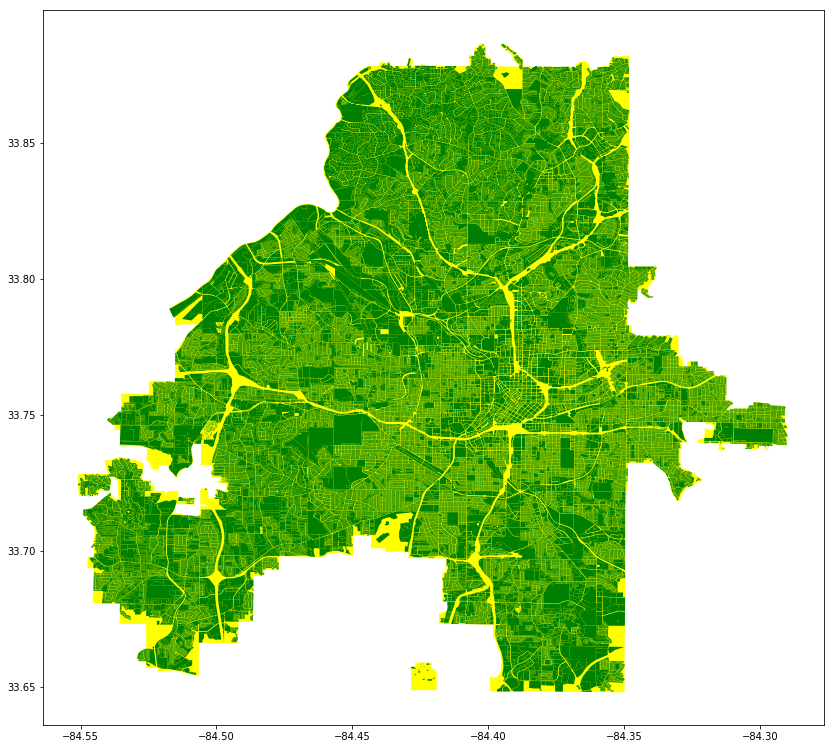

In [6]:
# NOTE: This is plotting around 165K parcels so it takes some time to complete...be patient.
ax = atl_limits.plot(figsize=(14, 14), color='yellow')
atl_parcels.plot(ax=ax, color='green')
plt.show()

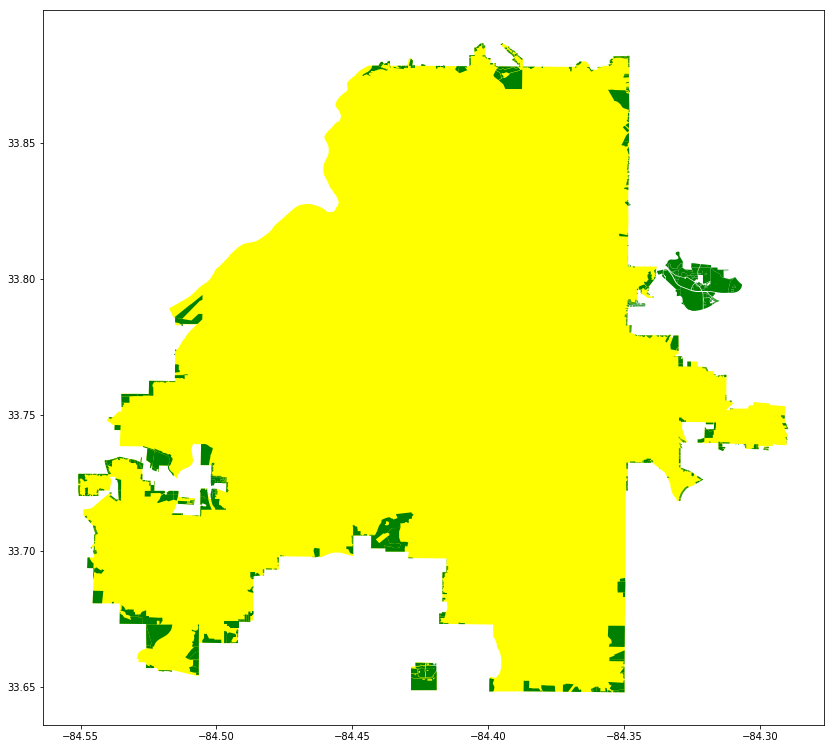

In [7]:
ax = atl_limits.plot(figsize=(14, 14), color='yellow')
not_atl_parcels.plot(ax=ax, color='green')
plt.show()

Looks to me that all parcels are within the City of Atlanta so I'm including all 165,850.